# WORLD HAPPINESS REPORT

The World Happiness Report is a landmark survey of the state of global happiness . It is a publication of the United Nations Sustainable Development Solutions Network. It contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors. As of March 2021, Finland had been ranked the happiest country in the world four times in a row.

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

The World Happiness Report 2021 focuses on the effects of COVID-19 and how people all over the world have fared. Our aim was two-fold, first to focus on the effects of COVID-19 on the structure and quality of people’s lives, and second to describe and evaluate how governments all over the world have dealt with the pandemic. In particular, we try to explain why some countries have done so much better than others.


Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import re

In [6]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud

## 1. Data Cleaning
Data may have missing values, wrong data types, outliers, etc. So, before you do EDA(Exploratory Data Analysis) on your data, please check for these things and if they are present, you have to clean the data before moving further otherwise you can get misleading and incorrect visuals. So get ready for cleaning!

In [3]:
df=pd.read_csv('world-happiness-report-2021.csv')

In [4]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
df.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [13]:
df.shape

(149, 20)

In [14]:
df.size

2980

In [16]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [17]:
df.isnull()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Hence, our dataset have no null values.

## 2. Data Analysis

Analysing data using distplot.

C:\Users\Rajeev Gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Happiness score')

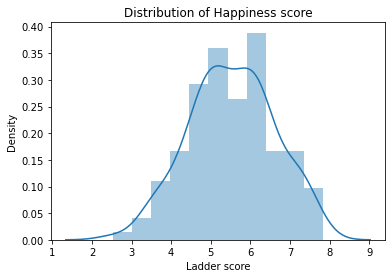

In [19]:
sb.distplot(df['Ladder score'])
plt.title('Distribution of Happiness score', fontsize=12)

Correlation between columns or features using heatmap:

<AxesSubplot:>

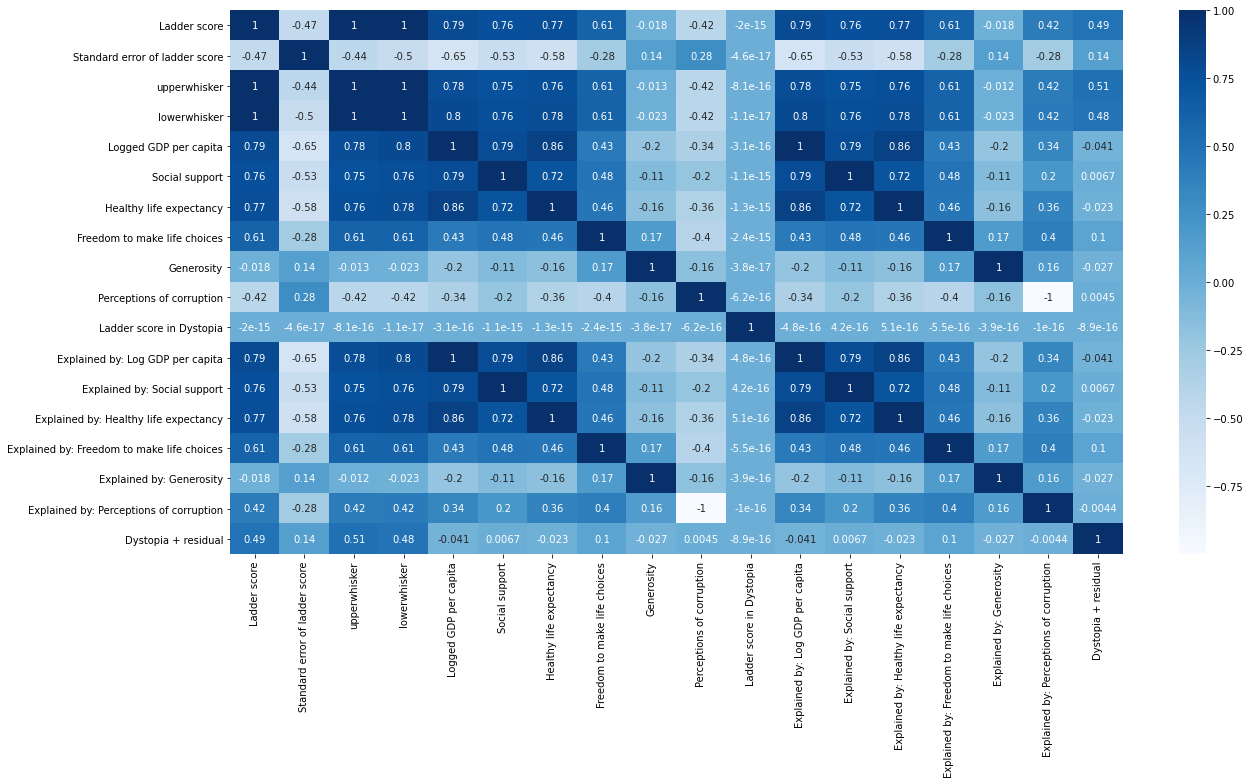

In [7]:
plt.figure(figsize=[20,10])
sb.heatmap(df.corr(),annot=True,cmap="Blues")

### Ladder score
The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.

In [32]:
ladder_score = df[['Ladder score',"Standard error of ladder score",'Country name']].sort_values("Ladder score",ascending=False)
ladder_score[:10]

,Ladder score,Standard error of ladder score,Country name
0,7.842,0.032,Finland
1,7.620,0.035,Denmark
2,7.571,0.036,Switzerland
3,7.554,0.059,Iceland
4,7.464,0.027,Netherlands
5,7.392,0.035,Norway
6,7.363,0.036,Sweden
7,7.324,0.037,Luxembourg
8,7.277,0.040,New Zealand
9,7.268,0.036,Austria


#### Hence Finland has the highest Ladder score among all the countries mentioned in the dataset.

### 3. Training Model using Linear Regression

Relationship between Logged GDP per capita with Ladder score- 

In [46]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 3)

print(train_data.shape)
print(test_data.shape)


(119, 21)
(30, 21)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

X_train = np.array(train_data['Logged GDP per capita'], dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Ladder score'], dtype = pd.Series)
lr.fit(X_train, y_train)

X_test = np.array(test_data['Logged GDP per capita'], dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Ladder score'], dtype = pd.Series)

In [44]:
y_train_predict = lr.predict(X_train)
#ROOT MEAN SQUARED ERROR
rmse = float(format(np.sqrt(mean_squared_error(y_train,y_train_predict)),'.3f'))
print("RMSE is {}".format(rmse))


RMSE is 0.65


In [47]:
y_test_predict = lr.predict(X_test)
#ROOT MEAN SQUARED ERROR
rmse = float(format(np.sqrt(mean_squared_error(y_test,y_test_predict)),'.3f'))
print("RMSE is {}".format(rmse))

RMSE is 0.684


Since difference is very less between the RMSEs of train and test data, so our model has fitted very nicely. Let's see how much our values deviate from ideal line.

Text(0, 0.5, 'Predicted')

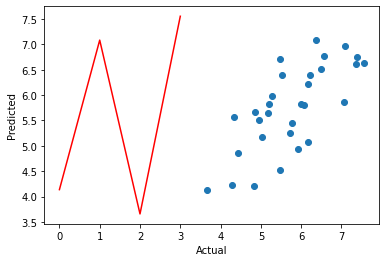

In [49]:
plt.scatter(y_test,y_test_predict)
plt.plot([min(y_test_predict), max(y_test_predict), min(y_test), max(y_test)], color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [48]:
from sklearn.model_selection import cross_val_score
cv = float(format(cross_val_score(lr,df[['Logged GDP per capita']],df['Ladder score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
#r = evaluation.shape[0]
#evaluation.loc[r] = ['Simple Linear Regression','-',rmse,rtrsm,'-',rtesm,'-',cv]
#evaluation

Average Score for Test Data: 5.747
Intercept: -1.574314235981496
Coefficient: [0.75363191]


### 4. Feature Engineering using Random Forest Regressor

We have many factors like GDP, Social support, Health, Freedom, Corruption, Dystopia, and Generosity for deciding how happy a country is. Now let's find which factor influence more to the happiness index. 
For this purpose, we will make a Machine Learning model and using the feature importance, we can know which factor is most important for happiness.

Using Random Forest in i)prior_col (7-13 columns)

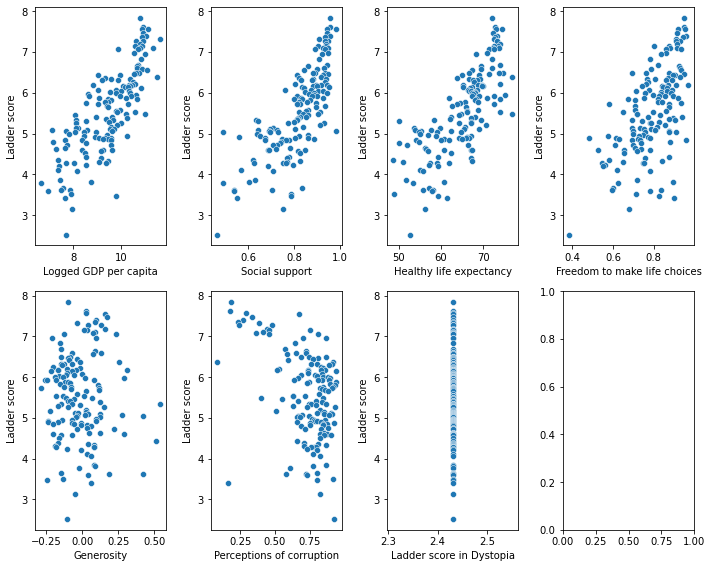

In [10]:
from sklearn.ensemble import RandomForestRegressor

y=df['Ladder score']
prior_col=['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']
X= df[prior_col]

fig, ax=plt.subplots(2,4, figsize=(10,8))
for prior_col, axis in zip(prior_col, ax.ravel()):
    sb.scatterplot(x=prior_col, y='Ladder score', data=df, ax=axis)

plt.tight_layout()

ii) col_to_consider (14-20 columns)

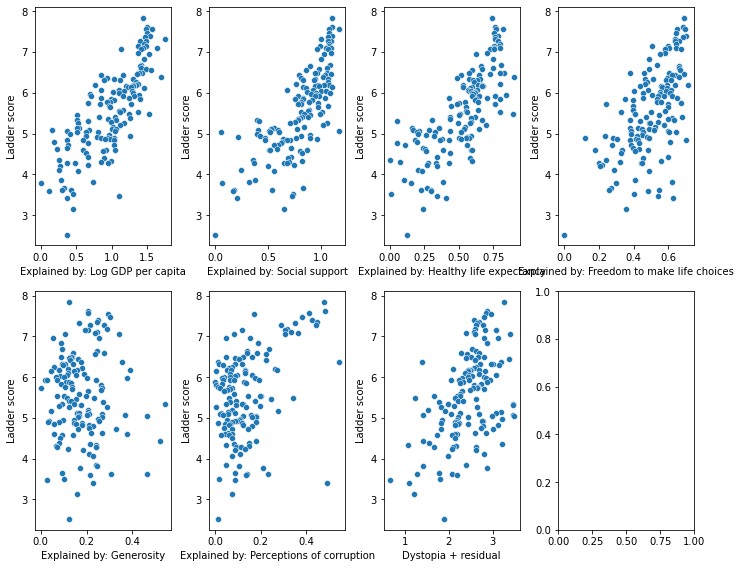

In [14]:
y=df['Ladder score']

col_to_consider=['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy',
                 'Explained by: Freedom to make life choices','Explained by: Generosity', 
                 'Explained by: Perceptions of corruption','Dystopia + residual']

X= df[col_to_consider]

fig, ax=plt.subplots(2,4, figsize=(10,8))
for after_col, axis in zip(col_to_consider, ax.ravel()):
    sb.scatterplot(x=after_col, y='Ladder score', data=df, ax=axis)

plt.tight_layout()

The prior columns and 'Explained by:' columns are correlated (except for the Dystopia). So, the ML model will give similar results whether you feed it prior columns or 'Explained by:' columns.

In [11]:
random_forest= RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=20, min_samples_split=40).fit(X,y)

#n_estimators: Number of trees to build
#max_depth: maximum depth at which tree can grow, it shouldn't overfit or underfit
#min_samples_leaf: minimum no of samples a leaf can have
#min_samples_split: minimum no of samples a node should have to split

#The data isn't splitted into train and test, because the focus is to find the important features contributing to happiness and 
#not predicting happiness from given features.

Text(0, 0.5, 'Feature importance')

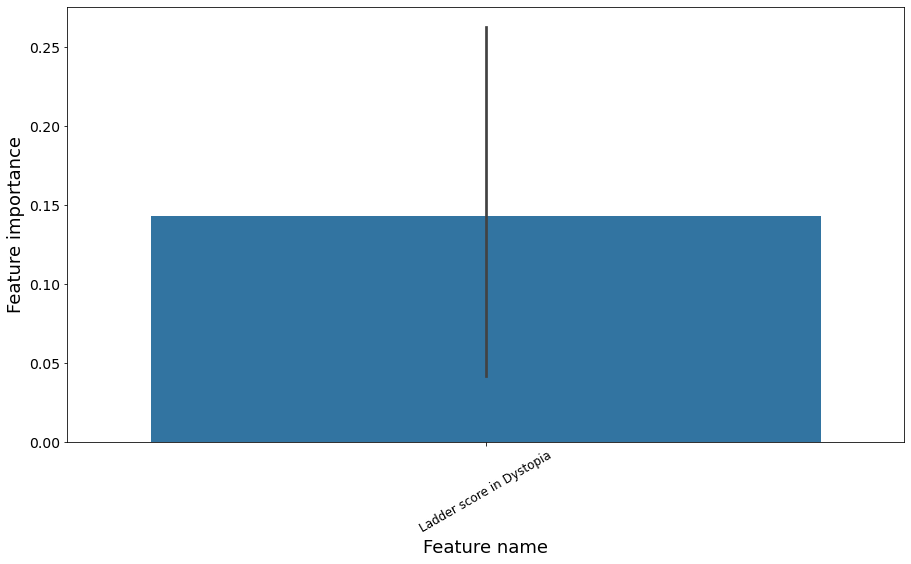

In [20]:
# Getting the feature importance
feature_importances_=random_forest.feature_importances_
feature_importances=pd.DataFrame({'Feature_name':prior_col, 'Feature_importance':feature_importances_})

fig, ax=plt.subplots(1, figsize=(15,8))
sb.barplot(x='Feature_name', y='Feature_importance', data=feature_importances, ax=ax)

# For making the graph look good
plt.xticks(fontsize=12, rotation=30); 
plt.yticks(fontsize=14);

plt.xlabel('Feature name',fontsize=18)
plt.ylabel('Feature importance',fontsize=18)

Text(0, 0.5, 'Feature importance')

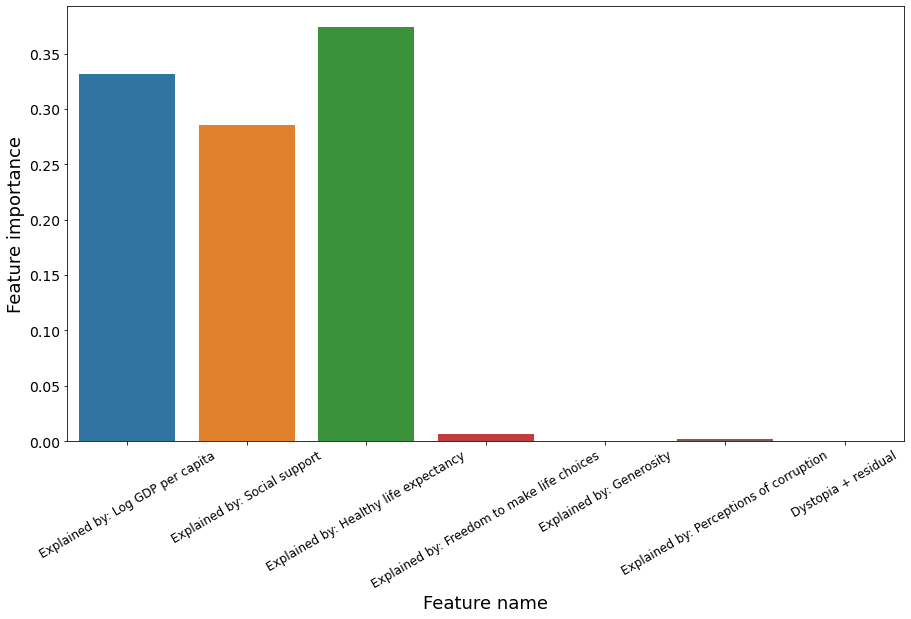

In [16]:
# Getting the feature importance
feature_importances_=random_forest.feature_importances_
feature_importances=pd.DataFrame({'Feature_name':col_to_consider, 'Feature_importance':feature_importances_})

fig, ax=plt.subplots(1, figsize=(15,8))
sb.barplot(x='Feature_name', y='Feature_importance', data=feature_importances, ax=ax)

# For making the graph look good
plt.xticks(fontsize=12, rotation=30); 
plt.yticks(fontsize=14);

plt.xlabel('Feature name',fontsize=18)
plt.ylabel('Feature importance',fontsize=18)

Since random forest gives better barplot to Explained By:columns(col_to_consider).  So we will be using that in future. 
So from the above graph, we find that 'Explained by: Healthy life expectancy' gives more value to Happiness Index.

### 5. EDA using seaborn library

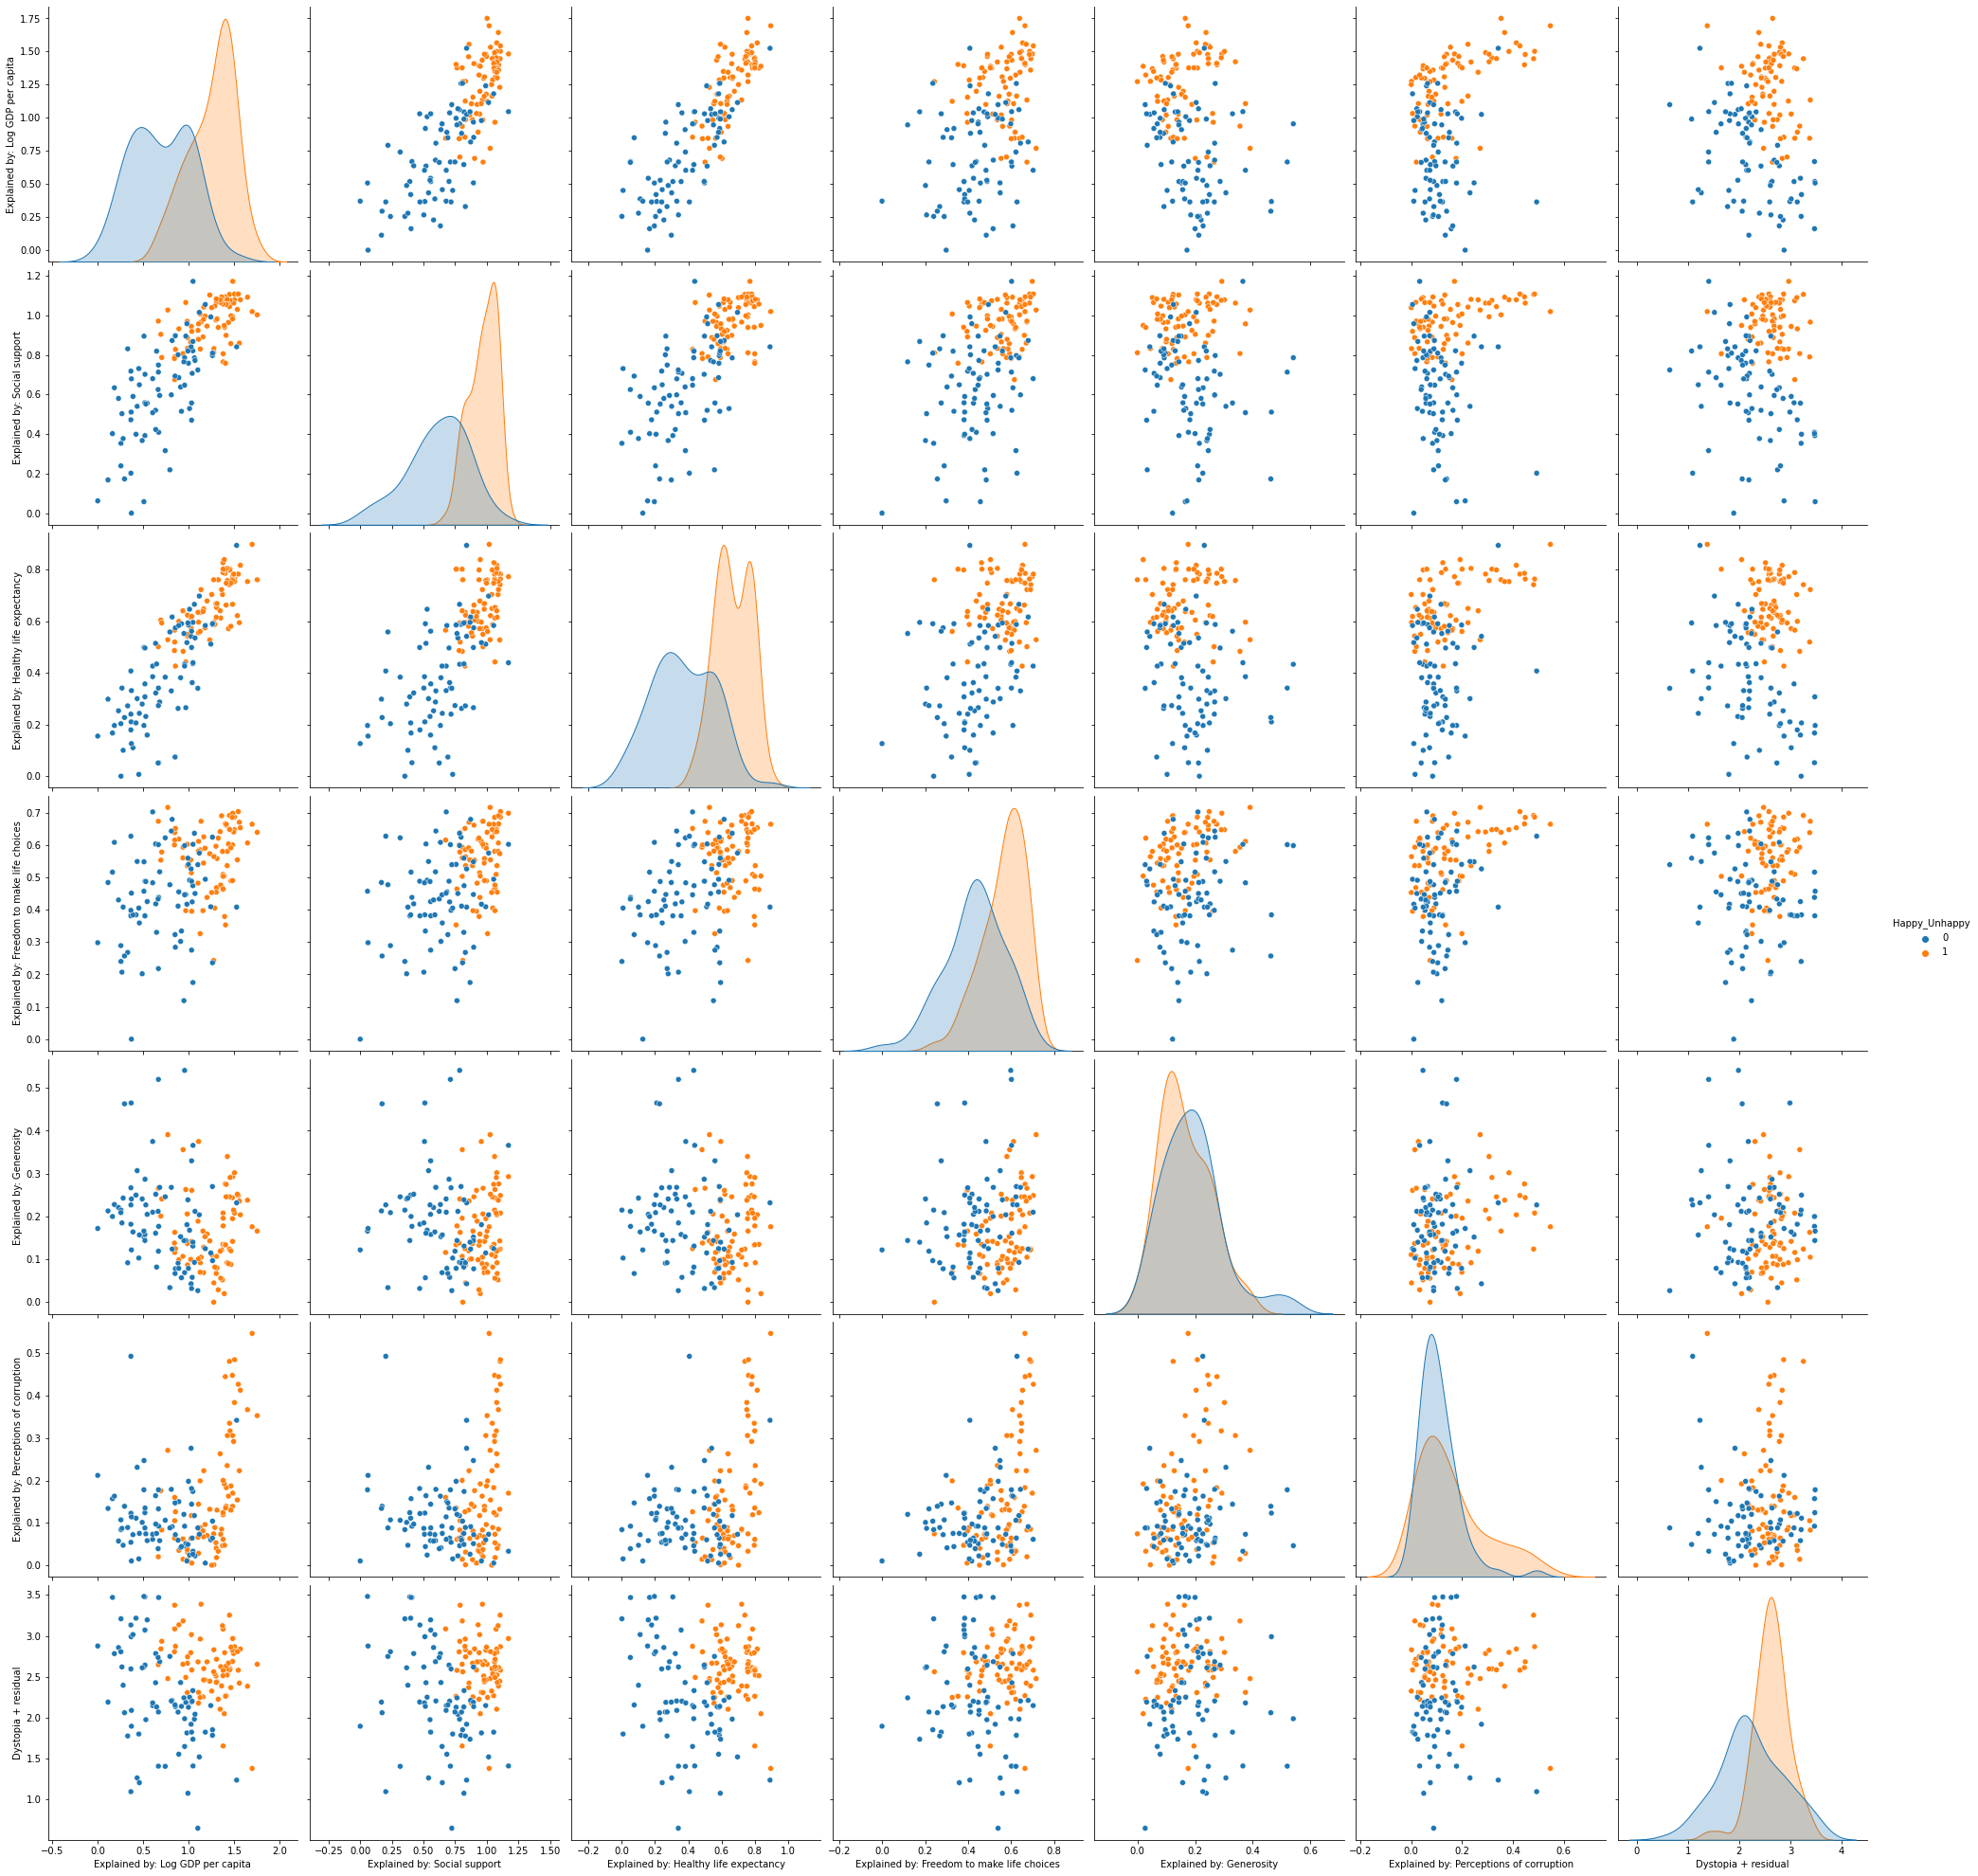

In [22]:
# Let's see how Happy and Unhappy contries varies based on varies parameters
# 0 =>Unhappy (Blue), 1 =>Happy (Orange)
# x_vars- variables on x-axis, and same for y_vars, hue=> column of your interest

thresold=df['Ladder score'].mean()
df['Happy_Unhappy']=df['Ladder score'].apply(lambda x: 1 if x>=thresold else 0)
ax=sb.pairplot(x_vars=col_to_consider, y_vars=col_to_consider, hue='Happy_Unhappy', data=df, height=4)

### Most and least happiest country

In [9]:
least_happy_country=df.sort_values(by='Ladder score', ignore_index=True)['Country name'].iloc[0]
most_happy_country=df.sort_values(by='Ladder score', ignore_index=True)['Country name'].iloc[-1]

print(f'The most happy country is {most_happy_country}, and the least happy country is {least_happy_country}')

The most happy country is Finland, and the least happy country is Afghanistan


In above code, df.sort_values will sort numeric values in ascending values.
If 'ignore_index' = False, the original index of the dataframe won't change after sorting. So to make changes: 'ignore_index' = True.
iloc is integer location, used to explicitly state that we are using a numerical index.

### Using wordcloud to get different country names participated in 2021

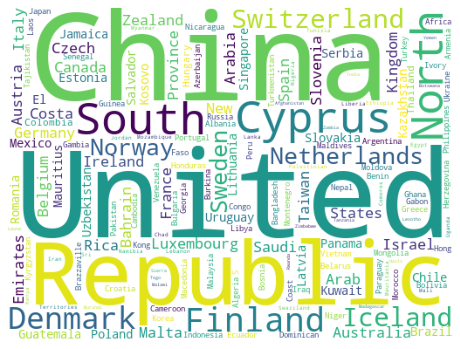

In [36]:
x = df['Country name']
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()